# Read NetCDF-CF using the Xarray module

## Purpose

This notebook introduces the Xarray module in Python and how to use it. Details about this module is available at http://xarray.pydata.org/en/stable/. 

## Read and check contents

Import the necessary modules to read the data.

In [1]:
import xarray as xr

Read data from a NetCDF file served over OPeNDAP. The file we are looking at here contains weather station data from Svalbard Lufthavn, Longyearbyen.

In [3]:
myfile = xr.load_dataset("https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99840.nc")

Check the content of the file.

In [5]:
myfile

<xarray.Dataset>
Dimensions:                        (time: 397152)
Coordinates:
  * time                           (time) datetime64[ns] 1975-08-01 ... 2019-...
Data variables:
    latitude                       float64 78.25
    longitude                      float64 15.5
    station_id                     |S64 b'SN99840'
    relative_humidity              (time) float32 0.78 0.88 0.79 ... 0.73 0.73
    surface_air_pressure_2m        (time) float32 1.011e+05 1.012e+05 ... 1e+05
    air_temperature_2m             (time) float32 278.0 276.6 ... 9.969e+36
    wind_from_direction_10m        (time) float32 230.0 260.0 ... 9.969e+36
    wind_speed_10m                 (time) float32 9.3 10.3 ... 9.969e+36
    air_pressure_at_sea_level      (time) float32 1.014e+05 ... 1.004e+05
    air_pressure_at_sea_level_qnh  (time) float32 9.969e+36 ... 1.003e+03
Attributes:
    station_name:                    SVALBARD LUFTHAVN
    wigos_identifier:                0-20000-0-01008
    wmo_identifier:                  01008
    date_created:                    2019-09-03T09:57:42.519877+00:00
    Conventions:                     ACDD-1.3,CF-1.6
    title:                           Observations from station SVALBARD LUFTH...
    institution:                     Norwegian Meteorological Institute
    source:                          Meterological surface observation via fr...
    history:                         2019-09-03T09:57:42.519877+00:00: frost ...
    references:                      
    acknowledgment:                  frost.met.no
    comment:                         Observations based on data from frost.me...
    creator_email:                   observasjon@met.no
    creator_name:                    Norwegian Meteorological Institute
    creator_url:                     https://met.no
    geospatial_bounds:               POINT(15.501500 78.245300)
    geospatial_bounds_crs:           latlon
    geospatial_lat_max:              78.245300
    geospatial_lat_min:              78.245300
    geospatial_lon_max:              15.501500
    geospatial_lon_min:              15.501500
    id:                              metno_obs_SN99840
    keywords:                        observations
    metadata_link:                   https://oaipmh.met.no/oai/?verb=GetRecor...
    summary:                         Surface meteorological observations from...
    time_coverage_start:             1975-08-01T00:00:00
    time_coverage_end:               2019-09-03T09:00:00
    featureType:                     timeSeries
    DODS.strlen:                     7
    DODS.dimName:                    station_id
    DODS_EXTRA.Unlimited_Dimension:  time

Check global attributes of the file.

In [9]:
myfile.attrs

{'station_name': 'SVALBARD LUFTHAVN',
 'wigos_identifier': '0-20000-0-01008',
 'wmo_identifier': '01008',
 'date_created': '2019-09-03T09:57:42.519877+00:00',
 'Conventions': 'ACDD-1.3,CF-1.6',
 'title': 'Observations from station SVALBARD LUFTHAVN SN99840',
 'institution': 'Norwegian Meteorological Institute',
 'source': 'Meterological surface observation via frost.met.no',
 'history': '2019-09-03T09:57:42.519877+00:00: frost write netcdf',
 'references': '',
 'acknowledgment': 'frost.met.no',
 'comment': 'Observations based on data from frost.met.no',
 'creator_email': 'observasjon@met.no',
 'creator_name': 'Norwegian Meteorological Institute',
 'creator_url': 'https://met.no',
 'geospatial_bounds': 'POINT(15.501500 78.245300)',
 'geospatial_bounds_crs': 'latlon',
 'geospatial_lat_max': '78.245300',
 'geospatial_lat_min': '78.245300',
 'geospatial_lon_max': '15.501500',
 'geospatial_lon_min': '15.501500',
 'id': 'metno_obs_SN99840',
 'keywords': 'observations',
 'metadata_link': 'htt

Check variables of the file.

In [8]:
myfile.data_vars

Data variables:
    latitude                       float64 78.25
    longitude                      float64 15.5
    station_id                     |S64 b'SN99840'
    relative_humidity              (time) float32 0.78 0.88 0.79 ... 0.73 0.73
    surface_air_pressure_2m        (time) float32 1.011e+05 1.012e+05 ... 1e+05
    air_temperature_2m             (time) float32 278.0 276.6 ... 9.969e+36
    wind_from_direction_10m        (time) float32 230.0 260.0 ... 9.969e+36
    wind_speed_10m                 (time) float32 9.3 10.3 ... 9.969e+36
    air_pressure_at_sea_level      (time) float32 1.014e+05 ... 1.004e+05
    air_pressure_at_sea_level_qnh  (time) float32 9.969e+36 ... 1.003e+03

Access a variable.

In [10]:
myfile['air_temperature_2m']

<xarray.DataArray 'air_temperature_2m' (time: 397152)>
array([2.78050e+02, 2.76650e+02, 2.78250e+02, ..., 9.96921e+36,
       9.96921e+36, 9.96921e+36], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1975-08-01 ... 2019-09-03T09:00:00
Attributes:
    long_name:              Air temperature
    coverage_content_type:  coordinate
    standard_name:          air_temperature
    units:                  K
    _ChunkSizes:            1022

## Plot results

Plot a variable.

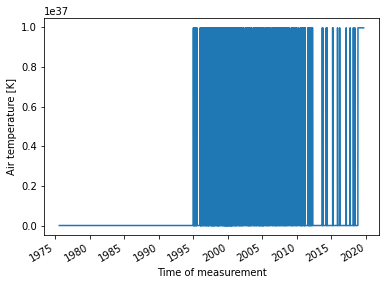

In [13]:
myfile['air_temperature_2m'].plot.line()

Fix the issue of missing variables.

In [16]:
tmp = myfile['air_temperature_2m'].where(myfile['air_temperature_2m']<400,drop=True)

And plot again.

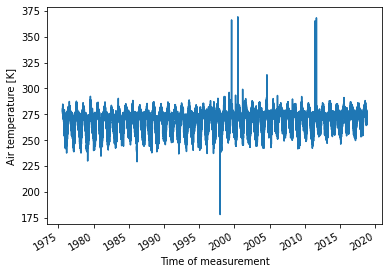

In [17]:
tmp.plot()

## Dump your data to a CSV file

Convert to a Pandas DataFrame.

In [18]:
import pandas as pd

In [19]:
mydf = tmp.to_dataframe()

Check the first rows of the data frame.

In [20]:
mydf.head()

,air_temperature_2m
time,
1975-08-01 00:00:00,278.049988
1975-08-01 06:00:00,276.649994
1975-08-01 12:00:00,278.250000
1975-08-01 18:00:00,278.250000
1975-08-02 00:00:00,276.950012


Create the comma separated file.

In [22]:
mydf.to_csv("myfile.csv")